/Users/anasawadalla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/anasawadalla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


    Adj. Close       Date  Moving Average 30  Moving Average Cumulative
0      169.040 2017-10-31                NaN                        NaN
1      166.890 2017-11-01                NaN                 169.040000
2      168.110 2017-11-02                NaN                 167.965000
3      172.500 2017-11-03                NaN                 168.013333
4      174.250 2017-11-06                NaN                 169.135000
..         ...        ...                ...                        ...
95     171.270 2018-03-21         173.082833                 172.370389
96     168.845 2018-03-22         173.393000                 172.358927
97     164.940 2018-03-23         173.713667                 172.322701
98     172.770 2018-03-26         174.273667                 172.247367
99      70.000 2018-03-27         171.183333                 172.252646

[100 rows x 4 columns]


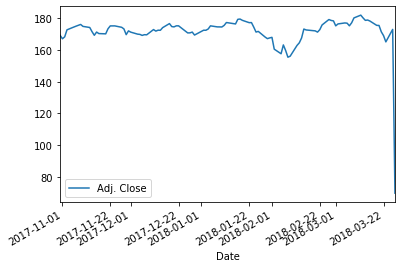

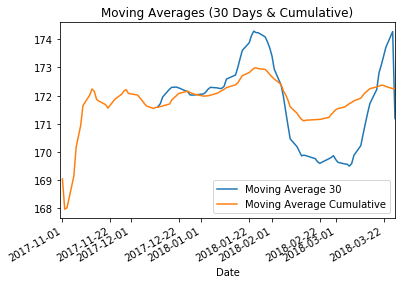

In [215]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import quandl

quandl.ApiConfig.api_key = 'D4egw_YKEaYCUSzp3fAC'

# Load the prices data for a stock
df = quandl.get("WIKI/AAPL")
df = df[['Adj. Close']]
df = df[9300:]
df['Date'] = df.index
############ ADD YOUR OWN DATA ##########
df['Adj. Close'][len(df)-1] = 70        #
df['Date'][len(df)-1] = '2018-03-27'    #
#########################################

df.index = pd.RangeIndex(len(df.index))

df.index = range(len(df.index))
df['Moving Average 30'] = df['Adj. Close'].rolling(30).mean()
df['Moving Average Cumulative'] = [df['Adj. Close'][:i].mean() for i in range(len(df))]
print(df)

# Plot the price and the moving average
df.plot(x='Date',y='Adj. Close')
ax = df.plot(x='Date',y='Moving Average 30')
df.plot(x='Date',y='Moving Average Cumulative', title = 'Moving Averages (30 Days & Cumulative)', ax = ax)

plt.show()

In [216]:

# Compute and print the z-scores for each day using the historical data up to that day
zscores = [(df['Moving Average 30'][i] - df['Moving Average Cumulative'][i]) / np.std(df['Moving Average Cumulative'][:i]) for i in range(len(df))]
print(zscores)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.018696293985292715, 0.08850243202437695, 0.27060314201889507, 0.4530766911195945, 0.3940320813018702, 0.3317445310297357, 0.2793947023262465, 0.18022421110219264, -0.015182219159295504, -0.08021704060683688, -0.05296947648472757, -0.02553416504748377, 0.07555462098339619, 0.13597241387260736, 0.22956198472604905, 0.26896721111304894, 0.186545639374819, 0.11835265239418362, 0.07936020949632368, 0.10958473562914489, 0.3027869076324077, 0.3535067622129659, 0.5515480140881925, 0.7440784711339623, 0.9158192020284583, 1.0771563004745865, 1.2531345398082498, 1.3363173541462166, 1.255027821295855, 1.2748655463613918, 1.15153253888323, 1.0569737665123884, 0.9387813931284729, 0.7388748065735262, 0.347262860513035, -0.022695193265411185, -0.19380968861506837, -0.5772792618601056, -0.9101071736270359, -1.1685537407700686, -1.230915514808723, -1.2784701

In [217]:
for i in range(len(df)):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        print ("Sell Short:")
        print("Date: "+ str(df['Date'][i]))
        print("Price: " + str(df['Adj. Close'][i]))
        print ("Z-Score: " + str(zscores[i]))
        print()
    # Buy long if the z-score is < 1
    elif zscores[i] < -1:
        print ("Buy Long:")
        print("Date: "+ str(df['Date'][i]))
        print("Price: " + str(df['Adj. Close'][i]))
        print ("Z-Score: " + str(zscores[i]))
        print()
    # Clear positions if the z-score between -.5 and .5
    elif abs(zscores[i]) < 0.5:
        print ("Clear Position:")
        print("Date: "+ str(df['Date'][i]))
        print("Price: " + str(df['Adj. Close'][i]))
        print ("Z-Score: " + str(zscores[i]))
        print()

Clear Position:
Date: 2017-12-13 00:00:00
Price: 172.27
Z-Score: 0.018696293985292715

Clear Position:
Date: 2017-12-14 00:00:00
Price: 172.22
Z-Score: 0.08850243202437695

Clear Position:
Date: 2017-12-15 00:00:00
Price: 173.87
Z-Score: 0.27060314201889507

Clear Position:
Date: 2017-12-18 00:00:00
Price: 176.42
Z-Score: 0.4530766911195945

Clear Position:
Date: 2017-12-19 00:00:00
Price: 174.54
Z-Score: 0.3940320813018702

Clear Position:
Date: 2017-12-20 00:00:00
Price: 174.35
Z-Score: 0.3317445310297357

Clear Position:
Date: 2017-12-21 00:00:00
Price: 175.01
Z-Score: 0.2793947023262465

Clear Position:
Date: 2017-12-22 00:00:00
Price: 175.01
Z-Score: 0.18022421110219264

Clear Position:
Date: 2017-12-26 00:00:00
Price: 170.57
Z-Score: -0.015182219159295504

Clear Position:
Date: 2017-12-27 00:00:00
Price: 170.6
Z-Score: -0.08021704060683688

Clear Position:
Date: 2017-12-28 00:00:00
Price: 171.08
Z-Score: -0.05296947648472757

Clear Position:
Date: 2017-12-29 00:00:00
Price: 169.2